<center> <h1> Phishing Website Detection based on Supervised Machine Learning with
Wrapper Features Selection </h1> </center>

## Eksploratorna analiza i priprema podataka

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Učitavanje i dimenzionalnost podataka

In [13]:
data = pd.read_csv('data/training_dataset.csv', index_col=0)
print(f'Dimenzionalnost podataka: {data.shape}')

Dimenzionalnost podataka: (11055, 31)


In [14]:
print('Prvih 5 redova DataFramea: ')
data.head()

Prvih 5 redova DataFramea: 


,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
id,,,,,,,,,,,,,,,,,,,,,
1,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
2,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
3,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
4,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
5,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


## Opis skupa podataka

In [15]:
print('Nazivi značajki i odgovarajući tipovi podataka: ')
data.dtypes

Nazivi značajki i odgovarajući tipovi podataka: 


having_IP_Address              int64
URL_Length                     int64
Shortining_Service             int64
having_At_Symbol               int64
double_slash_redirecting       int64
Prefix_Suffix                  int64
having_Sub_Domain              int64
SSLfinal_State                 int64
Domain_registeration_length    int64
Favicon                        int64
port                           int64
HTTPS_token                    int64
Request_URL                    int64
URL_of_Anchor                  int64
Links_in_tags                  int64
SFH                            int64
Submitting_to_email            int64
Abnormal_URL                   int64
Redirect                       int64
on_mouseover                   int64
RightClick                     int64
popUpWidnow                    int64
Iframe                         int64
age_of_domain                  int64
DNSRecord                      int64
web_traffic                    int64
Page_Rank                      int64
G

Značajke:
 - having_IP_Address* - koristi li se IP adresa unutar URL-a
 - URL_Length** - duljina URL-a podijeljena u klase
 - Shortining_Service* - koristi li se servis za skraćivanje URL-a
 - having_At_Symbol* - sadrži li URL simbol `@`
 - double_slash_redirecting* - pojavljuje li se `//` više od jednom
 - Prefix_Suffix* - sadrži li ime domene znak `-`
 - having_Sub_Domain** - sadrži li ULR poddomenu
 - SSLfinal_State** - koristi li se HTTPS te je li izdavatelj vjerodostojan
 - Domain_registeration_length* - je li životni vijek domene dulji od jedne godine
 - Favicon* - je li Favicon učitan iz vanjske domene
 - port* - koristi li se nesiguran port
 - HTTPS_token* - koristi li se HTTPS token u domenskom dijelu URL-a
 - Request_URL** - udio zahtjeva iz vanjske domene prilikom učitavanja stranice
 - URL_of_Anchor** - udio `<a>` tagova koji pokazuju na vanjske domene ili ne pokazuju ni na što
 - Links_in_tags** - udio linkova u `<Meta>`, `<Script>`, `<Link>` tagovima
 - SFH(_Server Form Handler_)** - prosljeđuju li se podatci iz forme igdje te ako jesu šalju li se u vanjsku domenu
 - Submitting_to_email* - prosljeđuju li se podatci iz forme na mail
 - Abnormal_URL* - je li ime hosta sadržano u URL-u
 - Redirect* - broj preusmjeravanja na stranici
 - on_mouseover* - mijenja li `onMouseOver` događaj traku statusa
 - RightClick* - je li onemogućen desni klik
 - popUpWindow* - sadrži li stranica iskočni prozor u koji se upisuju informacije
 - Iframe* - koristi li se `<iframe>` tag
 - age_of_domain* - je li domena starija od 6 mjeseci
 - DNSRecord* - postoji li DNS zapis o domeni
 - web_traffic** - rank u `Alexa` bazi podataka (broj posjećivanja stranice)
 - Page_Rank* - je li PageRank manji od 0.2
 - Google_Index* - je li stranica indeksirana od strane Google-a
 - Links_pointing_to_page* - broj linkova koji pokazuju na stranicu
 - Statistical_report* - host pripada u `Top Phishing IPs` ili `Top Phishing Domains`
 - Result* - ciljani razred - služi li stranica za phishing


*značajka je podijeljena u dvije klase: (-1: phishing, 1: sigurno)
**značajka je podijeljena u tri klase: (-1: phishing, 0: sumnjivo, 1: sigurno)

## Nedostajuće vrijednosti

In [16]:
data.isna().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

In [17]:
data.isnull().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

Iz prethodnih ćelija vidljivo je kako nema nedostajućih vrijednosti u skupu podataka.

## Monotone varijable

In [18]:
data.nunique()

having_IP_Address              2
URL_Length                     3
Shortining_Service             2
having_At_Symbol               2
double_slash_redirecting       2
Prefix_Suffix                  2
having_Sub_Domain              3
SSLfinal_State                 3
Domain_registeration_length    2
Favicon                        2
port                           2
HTTPS_token                    2
Request_URL                    2
URL_of_Anchor                  3
Links_in_tags                  3
SFH                            3
Submitting_to_email            2
Abnormal_URL                   2
Redirect                       2
on_mouseover                   2
RightClick                     2
popUpWidnow                    2
Iframe                         2
age_of_domain                  2
DNSRecord                      2
web_traffic                    3
Page_Rank                      2
Google_Index                   2
Links_pointing_to_page         3
Statistical_report             2
Result    

Funkcija `nunique` vraća broj jedinstvenih vrijednosti po stupcima. Vidljivo je da nema značajki koje bi bile kandidati za monotone varijable.

## Deskriptivne statistike

Kako su sve značajke kategoričke i tipa `int64` ne možemo dobiti primjerenu deskriptivnu statistiku naredbom `describe`. Stoga je za svaku značajku izračunata frekvencija pojavljivanja svake oznake te udio pojavljivanja te oznake u svim podatcima.

In [19]:
for column in data:
    print(f'{column:}')
    temp_df = pd.DataFrame(columns=['value', 'frequency', 'percent'])
    for index, value in enumerate(sorted(data[column].unique())):
        frequency = len(data[data[column] == value])
        temp_df.loc[index] = [value, frequency, round(frequency / len(data[column]) * 100, 2)]

    print(temp_df.to_string(index=False))
    print()

having_IP_Address
 value  frequency  percent
  -1.0     3793.0    34.31
   1.0     7262.0    65.69

URL_Length
 value  frequency  percent
  -1.0     8960.0    81.05
   0.0      135.0     1.22
   1.0     1960.0    17.73

Shortining_Service
 value  frequency  percent
  -1.0     1444.0    13.06
   1.0     9611.0    86.94

having_At_Symbol
 value  frequency  percent
  -1.0     1655.0    14.97
   1.0     9400.0    85.03

double_slash_redirecting
 value  frequency  percent
  -1.0     1429.0    12.93
   1.0     9626.0    87.07

Prefix_Suffix
 value  frequency  percent
  -1.0     9590.0    86.75
   1.0     1465.0    13.25

having_Sub_Domain
 value  frequency  percent
  -1.0     3363.0    30.42
   0.0     3622.0    32.76
   1.0     4070.0    36.82

SSLfinal_State
 value  frequency  percent
  -1.0     3557.0    32.18
   0.0     1167.0    10.56
   1.0     6331.0    57.27

Domain_registeration_length
 value  frequency  percent
  -1.0     7389.0    66.84
   1.0     3666.0    33.16

Favicon
 value  

## Grafički prikaz distribucija

Metoda `plot_distribution(feature)` služi za paralelno iscrtavanje pitnog istupčastog dijagrama nad pojedinom značajkom skupa podataka.

In [20]:
def plot_distribution(feature):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    feature.value_counts().plot(kind='pie', startangle=90)
    plt.subplot(1, 2, 2)
    feature.plot(kind='hist')
    plt.show()

In [21]:
# for column in data:
#     plot_distribution(data[column])

## Korelacija među značajkama

Kako pojedini modeli kreću od pretpostavke nezavisnosti, potrebno je provjeriti postoji li korelacija među značajkama. Korelaciju moguće je provjeriti korelacijskom matricom koja će na svakom mjestu `(i, j)` imati vrijednost korelacije između i-te značajke i j-te značajke.

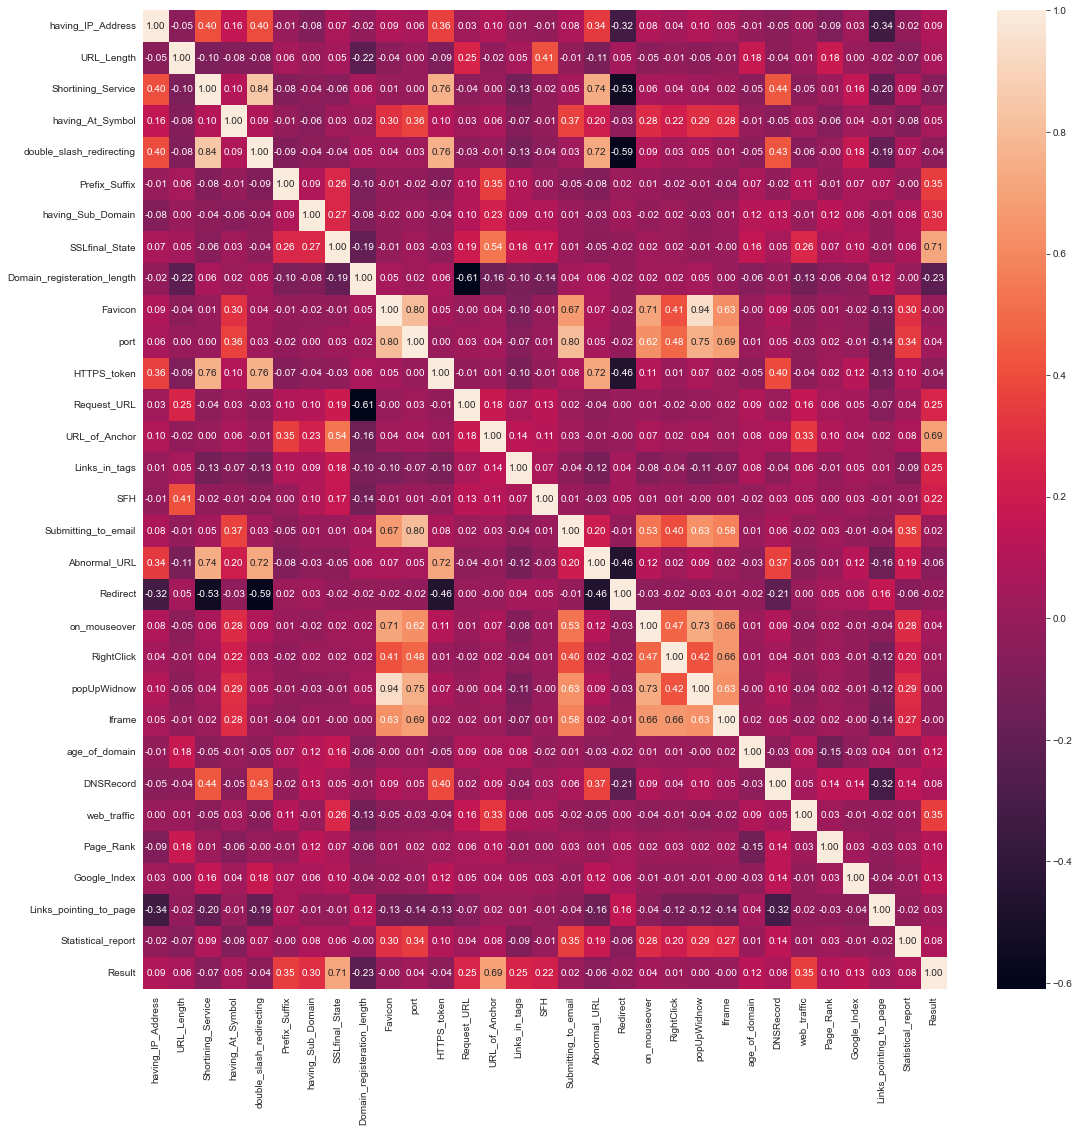

In [22]:
correlation_matrix = data.corr()
plt.figure(figsize=(18, 18))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.show()

Prema korelacijskoj matrici vidljivo je da postoje umjereno i jako korelirani parovi značajki od kojih najveću kolinearnost imaju:
* r(`popUpWindow` , `Favicon`) = 0.94
* r(`double_slash_redirecting` , `Shorting_Service`) = 0.84
* r(`port` , `Favicon`) = 0.80
* r(`Submitting_to_email` , `port`) = 0.80


# Repliciranje rezultata



Kako bi smo mogli uspoređivati modele potrebno je definirati performanse po kojima će se uspoređivati.

Za početak, potrebno je definirati matricu zabune koja se sastoji od točno pozitivnih (*engl. True Positive* (TP)), lažno pozitivnih (*engl. False Positive* (FP)), točno negativnih (*engl. True Negative* (TN)) i lažno negativnih (*engl. False Negative* (FN)) primjera.

Za usporedbu modela koriste se 4 performanse:
   - Omjer točnih klasifikacija (*engl. Correct Classification Rate* (CCR))
   - Omjer točno pozitivnih (*engl. True Positive Rate* (TPR))
   - Omjer točno negativnih (*engl. True Negativa Rate* (TNR))
   - Geometrijska sredina (*engl. Geometric mean* (GM))

Svaka od tih performansi definirana je svojom formulom:
\begin{aligned}
    CCR &= \frac{TP + TN}{TP + FP + FN + TN}(\%) \\
    TPR &= \frac{TP}{TP + FN} \\
    TNR &= \frac{TN}{TN + FP} \\
    GM &= \sqrt{TPR*TNR}
\end{aligned}

In [23]:
def get_measures(classifier, X, y):
    y_pred = classifier.predict(X)

    TP = np.sum((y_pred == 1) & (y == 1))
    FP = np.sum((y_pred == 1) & (y == -1))
    TN = np.sum((y_pred == -1) & (y == -1))
    FN = np.sum((y_pred == -1) & (y == 1))

    correct_classification_rate = (TP + TN) / (TP + FP + FN + TN)
    true_positive_rate = TP / (TP + FN)
    true_negative_rate = TN / (TN + FP)
    geometric_mean = np.sqrt(true_positive_rate * true_negative_rate)

    return correct_classification_rate, true_positive_rate, true_negative_rate, geometric_mean


Da bi smo mogli testirati modele potrebno je dostupne podatke podijeliti u skup podataka za treniranje (X_train) i skup podataka za testiranje (X_test). Uz to, kako bi smo mogli koristiti *CategoricalNB* klasifikator moramo preslikati ordinalne značajke na pozitivne vrijednosti.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

X = data.loc[:, data.columns != 'Result']
y = data.loc[:, 'Result']

X[X.columns] = OrdinalEncoder().fit_transform(X[X.columns])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

C:\Users\karlo\AppData\Local\Temp\ipykernel_19432\3534894451.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[X.columns] = OrdinalEncoder().fit_transform(X[X.columns])


In [25]:
selectors = dict()

### Principal Component Analysis (PCA)

Kako uspoređujemo *Wrapper Feature Selection* s značajkama odabranim pomoću *PCA*, potrebno je vidjeti koje značajke objašnjavaju najviše varijance.

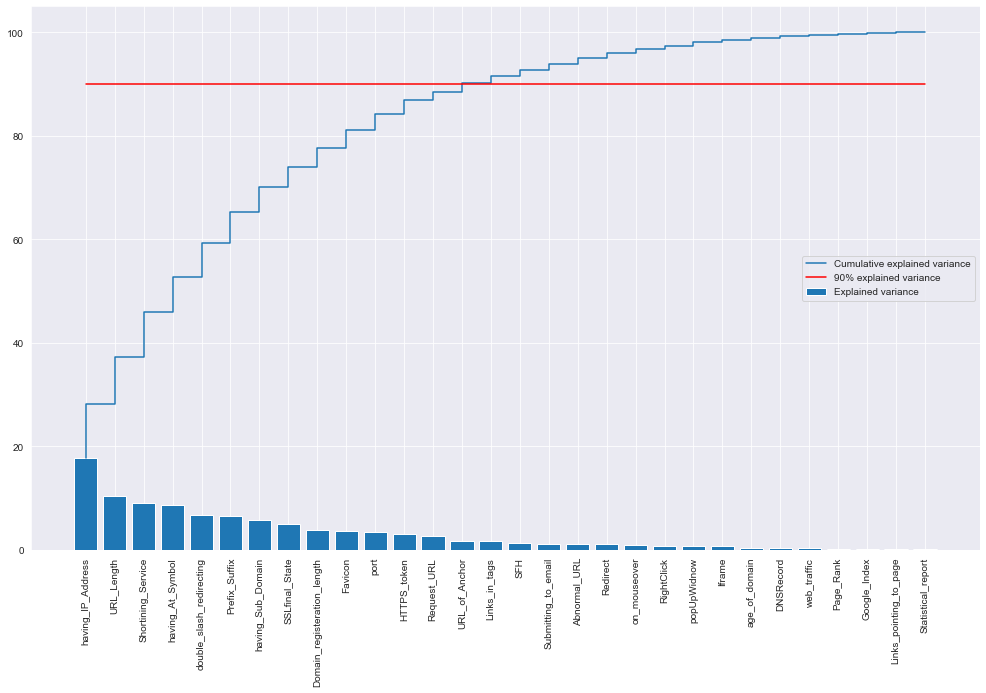

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
pca.fit(X)

plt.figure(figsize=(17, 10))
plt.bar(
    pca.feature_names_in_,
    pca.explained_variance_ratio_ * 100,
    label='Explained variance'
)

plt.step(
    pca.feature_names_in_,
    np.cumsum(pca.explained_variance_ratio_ * 100),
    label='Cumulative explained variance'
)

plt.plot(
    range(30),
    [90] * 30,
    color='r',
    label='90% explained variance'
)

plt.xticks(rotation=90)
plt.legend(loc='center right')
plt.style.use('_classic_test_patch')
plt.show()

I grafa iznad vidljivo je da prvih 13 značajki objašnjava 90% varijance te samo njih koristimo prilikom treniranja i testiranja modela.

In [27]:
pca = PCA(n_components=13).fit(X_train, y_train)
selectors['PCA'] = pca

### Information Gain (IG)

Još jedan način odabira značajki s kojim uspoređujemo *Wrapper Feature Selecion* je informacijska dobit (*Information Gain*). Informacijska dobit je, kao i *PCA*, statička analiza značajki te ne uzima u obzir pojedinosti svakog modela. U ovom slučaju implementirana je klasa *InfomationGainFeatureSelector* koja izračunava informacijsku dobit za svaku značajku te izbacuje značajke koje imaju informacijsku dobit jednaku nuli.

In [28]:
from sklearn.feature_selection import mutual_info_classif


class InformationGainFeatureSelector:
    def __init__(self):
        self.noninformative_features = []

    def fit(self, X, y):
        mutual_info = mutual_info_classif(X, y, discrete_features=True)

        for feature, gain in zip(X.columns, mutual_info):
            if gain == 0.0:
                self.noninformative_features.append(feature)

        return self

    def transform(self, X):
        return X.drop(columns=self.noninformative_features)

In [29]:
information_gain_selector = InformationGainFeatureSelector()
information_gain_selector.fit(X_train, y_train)

selectors['IG'] = information_gain_selector

Modeli koji se koriste u ovom radu su.
 - Umjetna neuronska mreža (BPNN)
 - Naivni Bayesov klasifikator (NB)
 - Stroj potpornih vektora (SVM)
 - Stablo odluke (C4.5)
 - Slučajne šume (RF)
 - Algoritam k najbližih susjeda (kNN)

In [30]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from mlxtend.feature_selection import SequentialFeatureSelector

### Sequential Feature Selection (SFS)

*Wrapper Feature Selection* može se napraviti na 3 načina:
 - Unaprijedna selekcija (*engl. Forward selection*) - kreće se od praznog seta značajki te se dodaje po jedna značajka koja najviše poboljšava određenu metriku.
 - Unazadna selekcija (*engl. Backward selection*) - kreće se sa svim značajkama te se izbacuje po jedna značajka koja najmanje smanjuje određenu metriku.
 - Dvosmjerna eliminacija (*engl. Bidirectional elimination*) - kombinacija unaprijedne i unazadne selekcije

#### CategoricalNB

In [31]:
sfs = SequentialFeatureSelector(
    CategoricalNB(),
    k_features=(15, 30),
    forward=True,
    floating=False,
    scoring='accuracy',
    verbose=0,
    cv=5,
    n_jobs=-1
)

sfs.fit(X_train, y_train)
selectors['CategoricalNB'] = sfs

#### MLPClassifier

In [32]:
sfs = SequentialFeatureSelector(
    MLPClassifier(hidden_layer_sizes=20, max_iter=1000),
    k_features=(15, 30),
    forward=True,
    floating=False,
    scoring='accuracy',
    verbose=0,
    cv=5,
    n_jobs=-1
)

sfs.fit(X_train, y_train)
selectors['MLPClassifier'] = sfs

#### SVC

In [33]:
sfs = SequentialFeatureSelector(
    SVC(),
    k_features=(15, 30),
    forward=True,
    floating=False,
    scoring='accuracy',
    verbose=0,
    cv=5,
    n_jobs=-1
)

sfs.fit(X_train, y_train)
selectors['SVC'] = sfs

#### DecisionTreeClassifier

In [34]:
sfs = SequentialFeatureSelector(
    DecisionTreeClassifier(),
    k_features=(15, 30),
    forward=True,
    floating=False,
    scoring='accuracy',
    verbose=0,
    cv=5,
    n_jobs=-1
)

sfs.fit(X_train, y_train)
selectors['DecisionTreeClassifier'] = sfs

#### RandomForestClassifier

In [35]:
sfs = SequentialFeatureSelector(
    RandomForestClassifier(),
    k_features=(15, 30),
    forward=True,
    floating=False,
    scoring='accuracy',
    verbose=0,
    cv=5,
    n_jobs=-1
)

sfs.fit(X_train, y_train)
selectors['RandomForestClassifier'] = sfs

#### KNeighborsClassifier

In [36]:
sfs = SequentialFeatureSelector(
    KNeighborsClassifier(n_neighbors=7),
    k_features=(15, 30),
    forward=True,
    floating=False,
    scoring='accuracy',
    verbose=0,
    cv=5,
    n_jobs=-1
)

sfs.fit(X_train, y_train)
selectors['KNeighboursClassifier'] = sfs

## Transformiranje podataka, treniranje i evaluiranje modela

Za svaki od korištenih klasifikatora korištena su četiri modela. Prvi model radi na originalnim podatcima. Drugi model koristi značajke odabrane pomoću *Wrapper Feature Selection*. Treći model koristi značajke odabrane pomoću *PCA* te četvrti pomoću *IG*.

In [37]:
results_list = []
MEASURES = ['CCR', 'TPR', 'TNR', 'GM']

### CategoricalNB

In [38]:
bayes_results = pd.DataFrame(columns=['Classifier', 'Measure', 'Without features selection', 'Wrapper', 'PCA', 'IG'])

bayes_clf = CategoricalNB().fit(X_train, y_train)
bayes_measures = get_measures(bayes_clf, X_test, y_test)


X_train_bayes = selectors['CategoricalNB'].transform(X_train)
X_test_bayes = selectors['CategoricalNB'].transform(X_test)

bayes_clf = CategoricalNB().fit(X_train_bayes, y_train)
bayes_measures_wrapper = get_measures(bayes_clf, X_test_bayes, y_test)


X_train_bayes = selectors['PCA'].transform(X_train)
X_test_bayes = selectors['PCA'].transform(X_test)

bayes_clf = GaussianNB().fit(X_train_bayes, y_train)
bayes_results_pca = get_measures(bayes_clf, X_test_bayes, y_test)


X_train_bayes = selectors['IG'].transform(X_train)
X_test_bayes = selectors['IG'].transform(X_test)

bayes_clf = CategoricalNB().fit(X_train_bayes, y_train)
bayes_measures_ig = get_measures(bayes_clf, X_test_bayes, y_test)

for i in range(4):
    bayes_results.loc[len(bayes_results)] = ['NB', MEASURES[i], bayes_measures[i], bayes_measures_wrapper[i], bayes_results_pca[i], bayes_measures_ig[i]]

bayes_results

,Classifier,Measure,Without features selection,Wrapper,PCA,IG
0,NB,CCR,0.928991,0.930348,0.906829,0.928991
1,NB,TPR,0.940371,0.941982,0.923449,0.940371
2,NB,TNR,0.914433,0.915464,0.885567,0.914433
3,NB,GM,0.927311,0.928628,0.904310,0.927311


U slučaju naivnog bayesovog klasifikatora najbolje rezultate dobivam u slučaju odabira značajki pomoću *Wrapper*-a, zatim bez odabira značajki i *IG* daju iste rezultate te *PCA* u ovom slučaju daje najlošije rezultate

### MLPClassifier

In [39]:
mlpc_results = pd.DataFrame(columns=['Classifier', 'Measure', 'Without features selection', 'Wrapper', 'PCA', 'IG'])

mlpc = MLPClassifier(hidden_layer_sizes=20, max_iter=1000).fit(X_train, y_train)
mlpc_measures = get_measures(mlpc, X_test, y_test)


X_train_mlpc = selectors['MLPClassifier'].transform(X_train)
X_test_mlpc = selectors['MLPClassifier'].transform(X_test)

mlpc = MLPClassifier(hidden_layer_sizes=20, max_iter=1000).fit(X_train_mlpc, y_train)
mlpc_measures_wrapper = get_measures(mlpc, X_test_mlpc, y_test)


X_train_mlpc = selectors['PCA'].transform(X_train)
X_test_mlpc = selectors['PCA'].transform(X_test)

mlpc = MLPClassifier(hidden_layer_sizes=20, max_iter=1000).fit(X_train_mlpc, y_train)
mlpc_measures_pca = get_measures(mlpc, X_test_mlpc, y_test)


X_train_mlpc = selectors['IG'].transform(X_train)
X_test_mlpc = selectors['IG'].transform(X_test)

mlpc = MLPClassifier(hidden_layer_sizes=20, max_iter=1000).fit(X_train_mlpc, y_train)
mlpc_measures_ig = get_measures(mlpc, X_test_mlpc, y_test)

for i in range(4):
    mlpc_results.loc[len(mlpc_results)] = ['BPNN', MEASURES[i], mlpc_measures[i], mlpc_measures_wrapper[i], mlpc_measures_pca[i], mlpc_measures_ig[i]]

mlpc_results

,Classifier,Measure,Without features selection,Wrapper,PCA,IG
0,BPNN,CCR,0.947987,0.942560,0.949344,0.945726
1,BPNN,TPR,0.964545,0.958904,0.956487,0.949234
2,BPNN,TNR,0.926804,0.921649,0.940206,0.941237
3,BPNN,GM,0.945486,0.940092,0.948312,0.945227


U slučaju umjetne neuronske mreže najbolje rezultate dobivamo korištenjem *PCA*, zatim bez odabira značajki pa *IG* te najlošije za *Wrapper*.

### SVC

In [40]:
svc_results = pd.DataFrame(columns=['Classifier', 'Measure', 'Without features selection', 'Wrapper', 'PCA', 'IG'])

svc = SVC().fit(X_train, y_train)
svc_measures = get_measures(svc, X_test, y_test)


X_train_svc = selectors['SVC'].transform(X_train)
X_test_svc = selectors['SVC'].transform(X_test)

svc = SVC().fit(X_train_svc, y_train)
svc_measures_wrapper = get_measures(svc, X_test_svc, y_test)


X_train_svc = selectors['PCA'].transform(X_train)
X_test_svc = selectors['PCA'].transform(X_test)

svc = SVC().fit(X_train_svc, y_train)
svc_measures_pca = get_measures(svc, X_test_svc, y_test)


X_train_svc = selectors['IG'].transform(X_train)
X_test_svc = selectors['IG'].transform(X_test)

svc = SVC().fit(X_train_svc, y_train)
svc_measures_ig = get_measures(svc, X_test_svc, y_test)

for i in range(4):
    svc_results.loc[len(svc_results)] = ['SVM', MEASURES[i], svc_measures[i], svc_measures_wrapper[i], svc_measures_pca[i], svc_measures_ig[i]]

svc_results

,Classifier,Measure,Without features selection,Wrapper,PCA,IG
0,SVM,CCR,0.952058,0.955676,0.947987,0.952058
1,SVM,TPR,0.962933,0.965351,0.957293,0.962933
2,SVM,TNR,0.938144,0.943299,0.936082,0.938144
3,SVM,GM,0.950458,0.954261,0.946628,0.950458


Korištenjem SVM-a dobivamo slične rezultate kao i kod naivnog bayesovom klasifikatora. Najbolje rezultate daje *Wrapper* zatim bez odabira značajki i *IG* te najlošije *PCA*.

### DecisionTreeClassifier

In [41]:
dtc_results = pd.DataFrame(columns=['Classifier', 'Measure', 'Without features selection', 'Wrapper', 'PCA', 'IG'])

dtc = DecisionTreeClassifier().fit(X_train, y_train)
dtc_measures = get_measures(dtc, X_test, y_test)


X_train_dtc = selectors['DecisionTreeClassifier'].transform(X_train)
X_test_dtc = selectors['DecisionTreeClassifier'].transform(X_test)

dtc = DecisionTreeClassifier().fit(X_train_dtc, y_train)
dtc_measures_wrapper = get_measures(dtc, X_test_dtc, y_test)


X_train_dtc = selectors['PCA'].transform(X_train)
X_test_dtc = selectors['PCA'].transform(X_test)

dtc = DecisionTreeClassifier().fit(X_train_dtc, y_train)
dtc_measures_pca = get_measures(dtc, X_test_dtc, y_test)


X_train_dtc = selectors['IG'].transform(X_train)
X_test_dtc = selectors['IG'].transform(X_test)

dtc = DecisionTreeClassifier().fit(X_train_dtc, y_train)
dtc_measures_ig = get_measures(dtc, X_test_dtc, y_test)

for i in range(4):
    dtc_results.loc[len(dtc_results)] = ['C4.5', MEASURES[i], dtc_measures[i], dtc_measures_wrapper[i], dtc_measures_pca[i], dtc_measures_ig[i]]

dtc_results

,Classifier,Measure,Without features selection,Wrapper,PCA,IG
0,C4.5,CCR,0.960651,0.955224,0.949344,0.957938
1,C4.5,TPR,0.960516,0.954069,0.954875,0.958098
2,C4.5,TNR,0.960825,0.956701,0.942268,0.957732
3,C4.5,GM,0.960670,0.955384,0.948551,0.957915


Korištenjem stabla odluke najbolje rezultate dobivamo kada ne biramo značajke. Nakon toga slijedi *IG* pa *Wrapper* te najlošije rezultate daje *PCA*.

### RandomForestClassifier

In [42]:
rfc_results = pd.DataFrame(columns=['Classifier', 'Measure', 'Without features selection', 'Wrapper', 'PCA', 'IG'])

rfc = RandomForestClassifier().fit(X_train, y_train)
rfc_measures = get_measures(rfc, X_test, y_test)


X_train_rfc = selectors['RandomForestClassifier'].transform(X_train)
X_test_rfc = selectors['RandomForestClassifier'].transform(X_test)

rfc = RandomForestClassifier().fit(X_train_rfc, y_train)
rfc_measures_wrapper = get_measures(rfc, X_test_rfc, y_test)


X_train_rfc = selectors['PCA'].transform(X_train)
X_test_rfc = selectors['PCA'].transform(X_test)

rfc = RandomForestClassifier().fit(X_train_rfc, y_train)
rfc_measures_pca = get_measures(rfc, X_test_rfc, y_test)


X_train_rfc = selectors['IG'].transform(X_train)
X_test_rfc = selectors['IG'].transform(X_test)

rfc = RandomForestClassifier().fit(X_train_rfc, y_train)
rfc_measures_ig = get_measures(rfc, X_test_rfc, y_test)

for i in range(4):
    rfc_results.loc[len(rfc_results)] = ['RF', MEASURES[i], rfc_measures[i], rfc_measures_wrapper[i], rfc_measures_pca[i], rfc_measures_ig[i]]

rfc_results

,Classifier,Measure,Without features selection,Wrapper,PCA,IG
0,RF,CCR,0.969697,0.970149,0.955224,0.970149
1,RF,TPR,0.975826,0.976632,0.962127,0.976632
2,RF,TNR,0.961856,0.961856,0.946392,0.961856
3,RF,GM,0.968816,0.969216,0.954227,0.969216


Prilikom korištenja slučajnih stabala najbolje rezultate pokazuje odabir značajki pomoću *IG* i *Wrapper* koji daju iste rezultate. Zatim slijedi slučaj u kojem smo koristili sve značajke, a najlošije performanse pokazuje slučaj u kojem biramo značajke pomoću *PCA*.

### KNeighborClassifier

In [43]:
knn_results = pd.DataFrame(columns=['Classifier', 'Measure', 'Without features selection', 'Wrapper', 'PCA', 'IG'])

knn = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)
knn_measures = get_measures(knn, X_test, y_test)


X_train_knn = selectors['KNeighboursClassifier'].transform(X_train)
X_test_knn = selectors['KNeighboursClassifier'].transform(X_test)

knn = KNeighborsClassifier(n_neighbors=7).fit(X_train_knn, y_train)
knn_measures_wrapper = get_measures(knn, X_test_knn, y_test)


X_train_knn = selectors['PCA'].transform(X_train)
X_test_knn = selectors['PCA'].transform(X_test)

knn = KNeighborsClassifier(n_neighbors=7).fit(X_train_knn, y_train)
knn_measures_pca = get_measures(knn, X_test_knn, y_test)


X_train_knn = selectors['IG'].transform(X_train)
X_test_knn = selectors['IG'].transform(X_test)

knn = KNeighborsClassifier(n_neighbors=7).fit(X_train_knn, y_train)
knn_measures_ig = get_measures(knn, X_test_knn, y_test)

for i in range(4):
    knn_results.loc[len(knn_results)] = ['kNN', MEASURES[i], knn_measures[i], knn_measures_wrapper[i], knn_measures_pca[i], knn_measures_ig[i]]

knn_results

,Classifier,Measure,Without features selection,Wrapper,PCA,IG
0,kNN,CCR,0.956581,0.950701,0.944821,0.956581
1,kNN,TPR,0.966962,0.960516,0.960516,0.966962
2,kNN,TNR,0.943299,0.938144,0.924742,0.943299
3,kNN,GM,0.955057,0.949264,0.942459,0.955057


U slučaju korištenja algoritma k-najbližih susjeda najbolje rezultate dobivamo ako koristimo sve značajke ili biranjem značajki pomoću *IG* zatim slijedi slučaj u kojem biramo značajke pomoću *Wrapper* te najlošije rezutate daje odabir značajki pomoću *PCA*.

## Vizualizacija rezultata

Rezultati svakog klasifikatora spremljeni su u zaseban *DataFrame* te ih je potrebno spojiti. Iz tog *DataFramea* izdvojeni su podatci za *CCR* kako bi se mogli prikazati na grafu, a ostali podatci su ispisani u obliku tablice.

In [44]:
results = pd.concat([mlpc_results, bayes_results, svc_results, dtc_results, knn_results, rfc_results, ])

results = results.reset_index(drop=True)
ccr_results = results.loc[results['Measure']=='CCR', ['Classifier', 'Without features selection', 'Wrapper', 'PCA', 'IG']]
results = results.loc[results['Measure'] != 'CCR', :]

results

,Classifier,Measure,Without features selection,Wrapper,PCA,IG
1,BPNN,TPR,0.964545,0.958904,0.956487,0.949234
2,BPNN,TNR,0.926804,0.921649,0.940206,0.941237
3,BPNN,GM,0.945486,0.940092,0.948312,0.945227
5,NB,TPR,0.940371,0.941982,0.923449,0.940371
6,NB,TNR,0.914433,0.915464,0.885567,0.914433
7,NB,GM,0.927311,0.928628,0.904310,0.927311
9,SVM,TPR,0.962933,0.965351,0.957293,0.962933
10,SVM,TNR,0.938144,0.943299,0.936082,0.938144
11,SVM,GM,0.950458,0.954261,0.946628,0.950458
13,C4.5,TPR,0.960516,0.954069,0.954875,0.958098


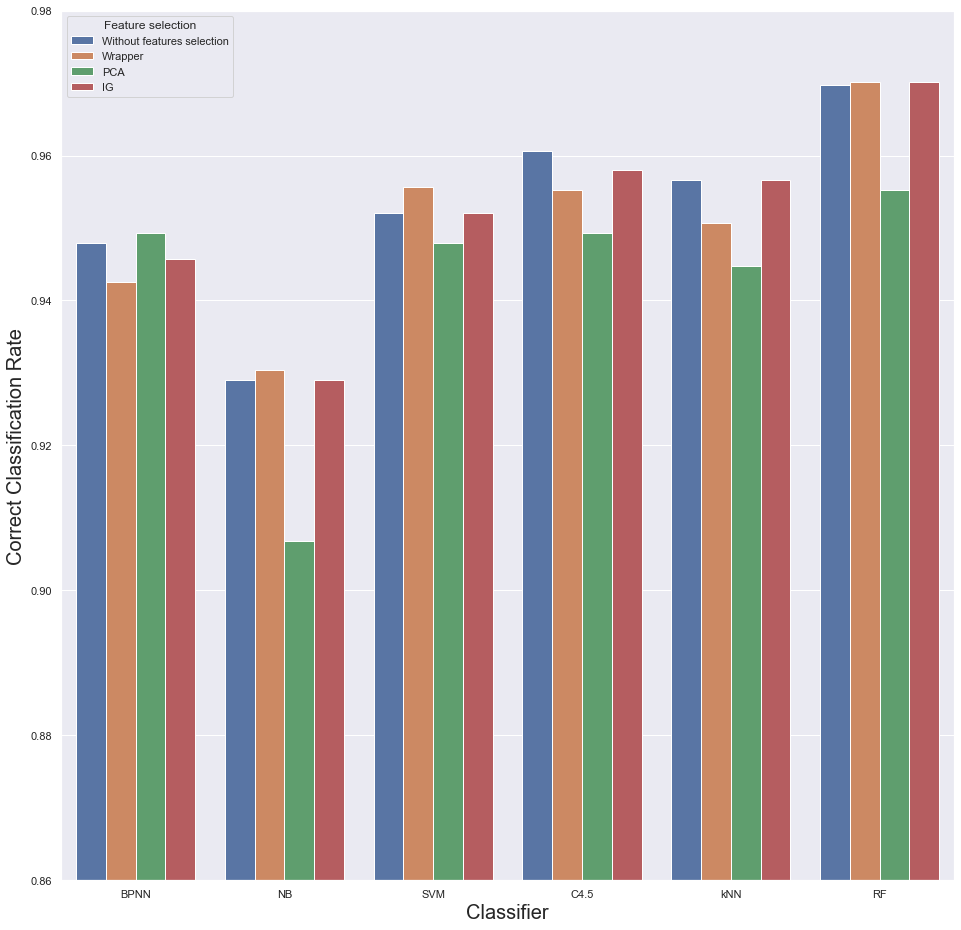

In [45]:
plt.figure(figsize=(16, 16))
sns.set(font_scale=1)
sns.barplot(data=ccr_results.melt(id_vars='Classifier', value_name='CCR', var_name='Feature selection'), x='Classifier', y='CCR', hue='Feature selection')
plt.ylabel('Correct Classification Rate', fontsize=20)
plt.xlabel('Classifier', fontsize=20)
plt.ylim((0.86, 0.98))
plt.show()